In [2]:
from __future__ import print_function
from datetime import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# Preliminary exercises
In this first part of the lab session you will learn to use concepts such as constants, placeholder, variables and TensorBoard.

## Exercise 1: currency

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/6/63/20_eurocent_common_2007.jpg/144px-20_eurocent_common_2007.jpg">
When the euro currency was introduced in the year 2002, the people in the Netherlands had to learn how to convert from gulden (the old currency) to euro and the other way around.

Luckily some people discovered the following trick that was taught to everybody in the Netherlands. If you want to convert from euro to gulden, then you double the amount of euros and you add 10%, that gives you the amount in guldens.

For example, suppose you have 5 euros. You double it (10) and add 10%, which makes it 11 gulden.
The trick can also can be applied the other way around of course. Suppose you have 11 gulden, remove 10% (10) and divide by 2. That gives you 5 euro.

Lets build a graph in TensorFlow that is able to convert from euro to gulden. Make sure that the input is flexible, and that you feed the network the amount you want to convert when you evaluate it. Export the graph to TensorBoard and give meaningful names to the nodes.

In [22]:
# Setup variables
gulden = tf.Variable(0.00, name='Gulden')
euros = tf.placeholder(tf.float32, name='Euros')
constant = tf.constant(2.20, name='Constant')
calculation_rule = gulden.assign(euros * constant)

sess = tf.Session()
# Initialize variables
sess.run(tf.global_variables_initializer())

sess.run(calculation_rule, feed_dict={euros: 5})
print(sess.run(gulden))

sess.run(calculation_rule, feed_dict={euros: 8})
print(sess.run(gulden))

11.0
17.6


## Exercise 2: boolean logic

As you might know from earlier years, many boolean operations can be expressed using so called logical gates (electrical components that are used in chips). It is possible to write more complex operations such as NAND, NOR and XOR from the fundamental logical operators OR, AND and NOT. The following image shows an XOR-gate that we will build as a network:

<img src="https://i.stack.imgur.com/3YG4z.png">

In this image:
- The circles represent the NOT-operations
- The gate (half-rectangle/half-circle shape) represents the AND-operation

The XOR (exclusive-or) behaves almost as the normal or, with the addition that if both values are true, the outcome is false:

| A     | B     | Outcome |
|-------|-------|---------|
| True  | True  | False   |
| True  | False | True    |
| False | True  | True    |
| False | False | False   |

Build a TensorFlow graph that is able to evaluate two booleans (tf.bool) with an XOR operation, by implementing the XOR only using ANDS and NOTS. **Please note: there is a tf.logical_xor, but you are not allowed to use that one in this exercise :-)**.

Give all your nodes a name and export them to TensorBoard so that you can view the generated graph.

In [23]:
result = tf.Variable(False, name='Outcome')
left = tf.placeholder(tf.bool, name='A')
right = tf.placeholder(tf.bool, name='B')
calculation_rule = result.assign(tf.math.not_equal(left, right))

sess = tf.Session()
# Initialize variables
sess.run(tf.global_variables_initializer())

sess.run(calculation_rule, feed_dict={left: True, right: True})
print(sess.run(result))

sess.run(calculation_rule, feed_dict={left: True, right: False})
print(sess.run(result))

sess.run(calculation_rule, feed_dict={left: False, right: True})
print(sess.run(result))

sess.run(calculation_rule, feed_dict={left: False, right: False})
print(sess.run(result))

False
True
True
False


## Exercise 3: Fibonacci series

The Fibonacci series is a mathematical series that is used for several applications. One of those applications is the growth of the rabbit population (as shown in the image below):

<img src="http://www.maths.surrey.ac.uk/hosted-sites/R.Knott/Fibonacci/fibrab.gif">

The Fibonacci-sequence can be calculated using the following formula $fib(n) = fib(n-1) + fib(n-2)$, where $fib(0) = 0$ and $fib(1) = 1$.

Write a TensorFlow graph that is able to generate Fibonacci numbers. The graph should keep track of all the numbers that already have been generated and add a new fibonacci number every time you evaluate the graph.

**Hints:**
- Use a variable with the initial values
- Expanding the dimensions of a variable is something you can achieve with tf.assign (with validate_shape set to False)

In [52]:
prev = tf.Variable(0, name='PrevFib')
fib = tf.Variable(1, name='Fib')
calc1 = prev.assign(fib - prev)
calc2 = fib.assign(prev + fib)

sess = tf.Session()
# Initialize variables
sess.run(tf.global_variables_initializer())

print(sess.run(fib))
for _ in range(10):
    sess.run(calc2)
    sess.run(calc1)
    print(sess.run(fib))

1
1
2
3
5
8
13
21
34
55
89


# Linear regression

## Exercise 4: single variable and bias

The dataset `housepricing.csv` (also used in week 1 of Introduction to Machine Learning) contains house prices for a given construction year. In the next cell we have created a plot of the data in the dataset.

Implement linear regression using TensorFlow to find the optimal function that describes this dataset.

**Hints:**
- Make sure the learning rate is small enough to let the algorithm train well
- You could use the AdamOptimizer instead of the GradientDescentOptimizer. This optimizer will automatically adjust the learning rate
- Monitor your slope, intercept and loss values using TensorBoard to see if your algorithm works well
- Don't be afraid to use a lot of training rounds (>12500?)

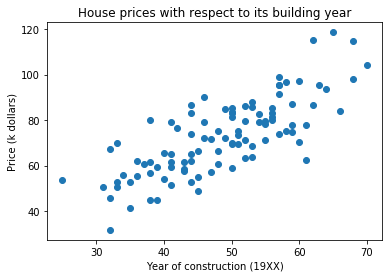

In [47]:
csv_data = np.genfromtxt('housepricing.csv', delimiter=',')

# Seperate the input and the output
data = np.array([x[0] for x in csv_data])
y_labels = np.array([x[1] for x in csv_data])

# Set graph information
plt.title('House prices with respect to its building year')
plt.xlabel('Year of construction (19XX)')
plt.ylabel('Price (k dollars)')

# Plot the points in a graph
plt.plot(data, y_labels, 'o');

In [ ]:
## Here comes your implementation of linear regression

## Exercise 5: multiple variables and bias

<img src="https://png.pngtree.com/element_origin_min_pic/16/09/03/2257cad8975e1e4.jpg" alt="drawing" style="width:200px;"/>
The following exercise uses data from a cattle market. Farmers go to this specific cattle market to buy cows and pigs. Each cow and pig has a fixed price. In addition, farmers have to pay an entry fee. The dataset (`cattlemarket.csv`) for this exercise contains the amount of cows and the amount of pigs that have been bought by the farmers and the total price. The entry fee is included in the total price.

The goal of this exercise is to train a linear regression model that is able to calculate the total price for a given number of cows and pigs (including the entry price). Use linear regression and TensorFlow to solve this problem.

When your model has been trained correctly, you should be able to find out what the prices are for a single cow, a single pig and what the entry price is by examining the weights/bias.

**Hints:**
- Define the linear regression formula for this problem
- Create the variables for amount of cows and amount of sheep in a matrix (instead of two separate variables) so that you can use a matrix multiplication
- Create a variable for the entry price
- Use gradient descent to train your algorithm
- Errors that often occur are problems with matrix sizes. It is wise to study the reshape operation in both NumPy and TensorFlow, so that you can easily change dimensions of a matrix (see: https://www.geeksforgeeks.org/numpy-reshape-python/)
- Often using the AdamOptimizer (instead of the GradientDescentOptimizer) gives you faster results

In [ ]:
# Your code here